## **Parallel processing performance**

Change root directory

In [2]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


Import Libraries

In [4]:
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
from src import satSimulationMagField as sim
from src import plotMagneticField as hplot
import matplotlib.pyplot as plt

Simulation Settings

In [36]:
## TLE of the satellite
line1 = "1 00000U 20000A   25015.00000000  .00000000  00000-0  00000-0 0  9991"
line2 = "2 00000  97.3400 313.1310 0000000  0.0000  0.0000 15.09556778000000"

# Simulation parameters
start_date = datetime(2025, 1, 15)
end_date = start_date + timedelta(days=100)
time_step = timedelta(hours=0.08)


# Ensure time_step is in seconds
time_step_seconds = time_step.total_seconds()
# Generate a range of timestamps
num_steps = int((end_date - start_date).total_seconds() / time_step_seconds) + 1
time_range = [start_date + timedelta(seconds=i * time_step_seconds) for i in range(num_steps)]

# Init Satellite 
sim.initialize_satellite(line1, line2)

Simulation with variable parallel_coils and batch_size

In [ ]:
# Initialize a list to store the execution times for different n_spires and points
execution_times = []

# Iniciar simulación
for batch_size in range(1, len(time_range),50):

    print ('batch_size: ', batch_size)
    
    start_time = time.time()
    df = sim.simulate_satellite(start_date, end_date, time_step, batch_size)
    end_time = time.time()
    
    # Calculate execution time
    execution_time = end_time - start_time
    
    # Store the results in the list
    execution_times.append([batch_size, execution_time])

# Create a pandas DataFrame
df = pd.DataFrame(execution_times, columns=['batch_size', 'execution_time'])

# Save the DataFrame to a CSV file
df.to_csv('data/parallel_test1.csv', index=False)

print("Execution times have been saved to 'execution_times.csv'.")
    

batch_size:  1


Process ForkProcess-12015:
Process ForkProcess-12008:
Process ForkProcess-12004:
Process ForkProcess-12017:
Process ForkProcess-12007:
Process ForkProcess-12001:
Process ForkProcess-12010:
Process ForkProcess-12009:
Process ForkProcess-12012:
Process ForkProcess-12019:
Process ForkProcess-12006:
Process ForkProcess-12018:
Process ForkProcess-12011:
Process ForkProcess-12016:
Process ForkProcess-12005:
Process ForkProcess-12003:
Process ForkProcess-12014:
Process ForkProcess-12020:
Process ForkProcess-12002:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File

In [5]:
df = pd.read_csv('data/parallel_test1.csv')

Plot obtained results

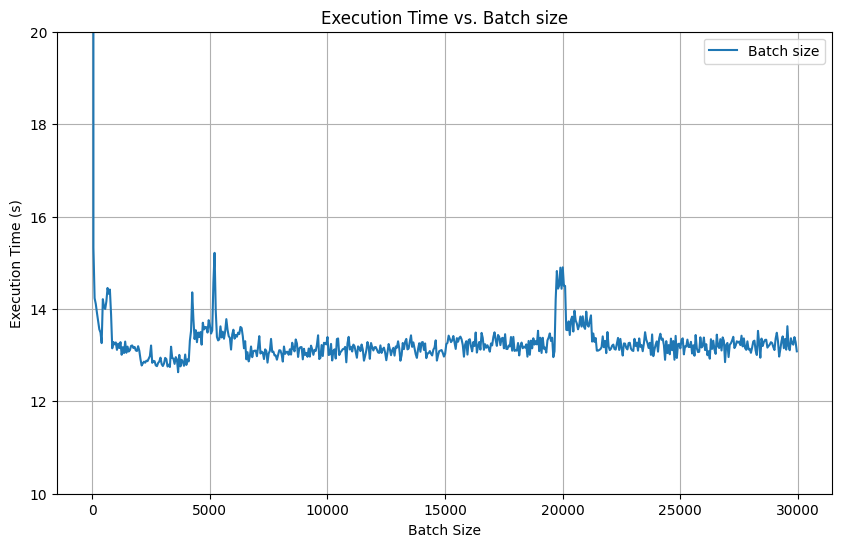

In [7]:
# Example plot code (assuming df is already defined and contains the necessary data)
plt.figure(figsize=(10, 6))
plt.plot(df['batch_size'], df['execution_time'], label=f"Batch size")

# Title and labels
plt.title("Execution Time vs. Batch size")
plt.xlabel("Batch Size")
plt.ylabel("Execution Time (s)")

# Add zoom by setting axis limits (adjust these values as needed)
#plt.xlim(0, 100)  # Set limits for x-axis (e.g., zooming into batch sizes between 0 and 100)
plt.ylim(10, 20)    # Set limits for y-axis (e.g., zooming into execution times between 0 and 2 seconds)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


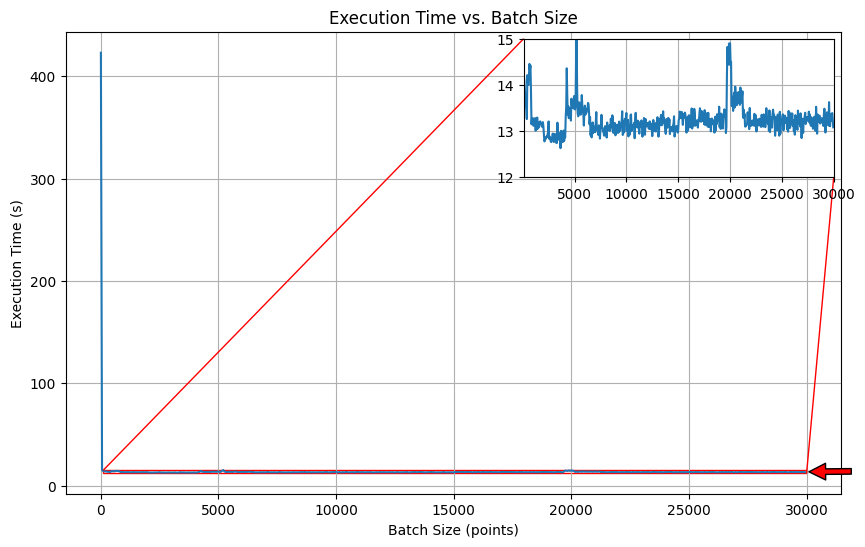

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np

# Example data (simulating df with data for the example)
# Assuming 'df' is a DataFrame with columns 'batch_size' and 'execution_time'
batch_size = df['batch_size']
execution_time = df['execution_time']

# Create the main figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the main data
ax.plot(batch_size, execution_time, label="Execution Time vs. Batch Size")

# Title and labels
ax.set_title("Execution Time vs. Batch Size")
ax.set_xlabel("Batch Size (points)")
ax.set_ylabel("Execution Time (s)")

# Add a zoom to the area of interest
# Define the region we want to zoom into, for example, between batch_size 10 to 30 and execution_time between 13 and 15
axins = inset_axes(ax, width="40%", height="30%", loc="upper right")  # You can adjust the size of the zoom
axins.plot(batch_size, execution_time, label="Zoomed Area")
axins.set_xlim(100, 30000)  # Zoom in this area on the x-axis
axins.set_ylim(12, 15)  # Zoom in this area on the y-axis

# Add a frame for the zoom
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", lw=1, ec="r")  # This draws a red frame

# Add an arrow pointing to the zoom area
# I changed the arrow coordinates to point to a valid area within the graph's limits
ax.annotate('', xy=(30000, 13.5), xytext=(32000, 14),  # Adjust the coordinates of the arrow
            arrowprops=dict(facecolor='red', shrink=0.05))

# Enable grid in the main plot
ax.grid(True)

# Enable grid in the zoomed area
axins.grid(True)

# Show the legend
ax.legend()

# Display the plot
plt.show()
